In [45]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [32]:
df = pd.read_csv('distances_single_tokens_colbert_12feb.csv', encoding='utf-8')


In [33]:
df

,joke,expression1,expression2,funniness_average,filtered_funniness_average,euclidean_distance,cosine_similarity
0,She was only a Waitress ' s daughter but she s...,dish it out,dish it out,0.6,1.000000,12.621944,0.586709
1,When the glazier was sent to the hospital room...,pane,pain,1.2,2.000000,18.441320,0.247996
2,The inventor of sandpaper had a rough time of ...,rough,rough,1.6,1.600000,13.749227,0.514092
3,"OLD CONTORTIONISTS never die , they just meet ...",meet their end,meet their end,0.2,1.000000,10.762417,0.673233
4,When you can ' t decide with your friends whos...,party,party,0.4,0.666667,16.522305,0.393078
...,...,...,...,...,...,...,...
1476,Weather forecasters have to have lots of degre...,degrees,degrees,2.0,2.000000,11.932990,0.707570
1477,"Christians , keep the faith . . . but not from...",keep,keep,0.0,0.000000,11.955064,0.632835
1478,There ' s a Sin dividing line between heaven a...,sin,sign,0.0,0.000000,17.085299,0.383086
1479,A computer program attached to an electric cha...,execution,execution,0.8,1.000000,16.785654,0.331882


In [34]:
from sklearn.model_selection import train_test_split


### Remove NaNs

In [35]:
df[df.isna().any(axis=1)]

,joke,expression1,expression2,funniness_average,filtered_funniness_average,euclidean_distance,cosine_similarity
96,A bible falling apart belongs to someone who i...,whole,hole,0.0,NaN,15.452782,0.500384
252,When some people open their mouth they put the...,put their foot in,put their foot in,0.0,NaN,17.106033,0.351444
443,"Il se muove , said Galileo , movingly",move,move,0.0,NaN,16.975450,0.378536
555,"I ' m single , Tom said wanly .",single,single,0.0,NaN,14.464879,0.572881
766,"Act your praise , not your shoe size .",praise,price,0.0,NaN,14.759510,0.364477
927,They owed me a lot of money for the new house ...,billed,billed,0.0,NaN,18.850290,0.254527
1114,"Dinna wave that axe aboot , Jimmy ! said Tom h...",ask,axe,0.0,NaN,15.931807,0.426721
1187,Drumming is not the way to catch a hare .,hare,hair,0.0,NaN,15.360841,0.484867
1234,One Sunday afternoon the Three Musketeers play...,touch,touch,0.0,NaN,12.367487,0.722951
1304,Time flies when you ’ re following the son,sun,son,0.0,NaN,15.801228,0.438751


In [36]:
df = df.dropna()

In [37]:
df[df.isna().any(axis=1)]

,joke,expression1,expression2,funniness_average,filtered_funniness_average,euclidean_distance,cosine_similarity


In [63]:
subset_df = df[['euclidean_distance', 'cosine_similarity', 'funniness_average', 'filtered_funniness_average']].copy()

subset_df['funniness_average_class'] = pd.cut(
    df['funniness_average'], bins=[-0.1, 1.25, 2.50, 3.75, 5.1], labels=[1, 2, 3, 4], right=True
)


In [64]:
subset_df

,euclidean_distance,cosine_similarity,funniness_average,filtered_funniness_average,funniness_average_class
0,12.621944,0.586709,0.6,1.000000,1
1,18.441320,0.247996,1.2,2.000000,1
2,13.749227,0.514092,1.6,1.600000,2
3,10.762417,0.673233,0.2,1.000000,1
4,16.522305,0.393078,0.4,0.666667,1
...,...,...,...,...,...
1476,11.932990,0.707570,2.0,2.000000,2
1477,11.955064,0.632835,0.0,0.000000,1
1478,17.085299,0.383086,0.0,0.000000,1
1479,16.785654,0.331882,0.8,1.000000,1


In [65]:
data = subset_df[['euclidean_distance', 'cosine_similarity']]
target = subset_df['funniness_average_class']
#target = df['filtered_funniness_average']


In [66]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True)


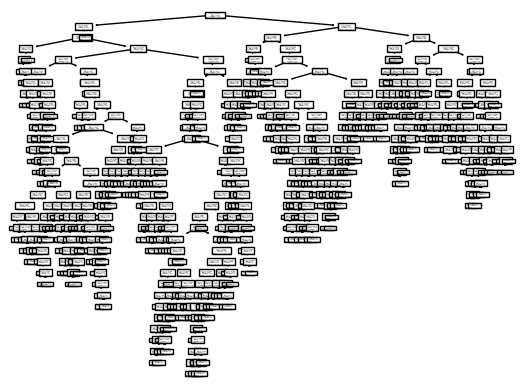

In [67]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
plot_tree(clf)
plt.show()

### Accuracy on train dataset

In [68]:
y_pred_train = clf.predict(x_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
print("Accuracy de l'ensemble de train : ", accuracy_train)
precision = precision_score(y_pred_train, y_train, average='weighted')
print("Précision : ", precision)
recall = recall_score(y_pred_train, y_train, average='weighted')
print("Recall : ", recall)
f1 = f1_score(y_pred_train, y_train, average='weighted')
print("F1-score : ", f1)
conf_mat = confusion_matrix(y_pred_train, y_train, normalize='all')
print("Matrice de confusion :\n", conf_mat)

Accuracy de l'ensemble de train :  1.0
Précision :  1.0
Recall :  1.0
F1-score :  1.0
Matrice de confusion :
 [[0.59438776 0.         0.        ]
 [0.         0.4005102  0.        ]
 [0.         0.         0.00510204]]


### Accuracy on test dataset

In [69]:
y_pred_test = clf.predict(x_test)
accuracy_test = accuracy_score(y_pred_test, y_test)
print("Accuracy de l'ensemble de test : ", accuracy_test)
precision = precision_score(y_pred_test, y_test, average='weighted')
print("Précision : ", precision)
recall = recall_score(y_pred_test, y_test, average='weighted')
print("Recall : ", recall)
f1 = f1_score(y_pred_test, y_test, average='weighted')
print("F1-score : ", f1)
conf_mat = confusion_matrix(y_pred_test, y_test, normalize='all')
print("Matrice de confusion :\n", conf_mat)

Accuracy de l'ensemble de test :  0.49830508474576274
Précision :  0.5033225719666398
Recall :  0.49830508474576274
F1-score :  0.5006427411422951
Matrice de confusion :
 [[0.32881356 0.25762712 0.00338983]
 [0.24067797 0.16949153 0.        ]
 [0.         0.         0.        ]]


/home/digit/miniconda3/envs/humour/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
y_pred_test = clf.predict(x_test)
accuracy_test = accuracy_score(y_pred_test, y_test)
print("Accuracy de l'ensemble de test : ", accuracy_test)
precision = precision_score(y_pred_test, y_test, average='micro')
print("Précision : ", precision)
recall = recall_score(y_pred_test, y_test, average='micro')
print("Recall : ", recall)
f1 = f1_score(y_pred_test, y_test, average='micro')
print("F1-score : ", f1)
conf_mat = confusion_matrix(y_pred_test, y_test, normalize='all')
print("Matrice de confusion :\n", conf_mat)

Accuracy de l'ensemble de test :  0.49830508474576274
Précision :  0.49830508474576274
Recall :  0.49830508474576274
F1-score :  0.49830508474576274
Matrice de confusion :
 [[0.32881356 0.25762712 0.00338983]
 [0.24067797 0.16949153 0.        ]
 [0.         0.         0.        ]]


# Loop to find the optimal deepth of the tree

<b>1. Division des données en un ensemble d'entrainement et un ensemble de test

In [74]:
x_train_val, x_test, y_train_val, y_test = train_test_split(data, target, test_size=0.1, random_state=21) 

<b>Division des données d'entrainement en un ensemble d'entrainement et un ensemble de validation

In [75]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.33, random_state=42) 

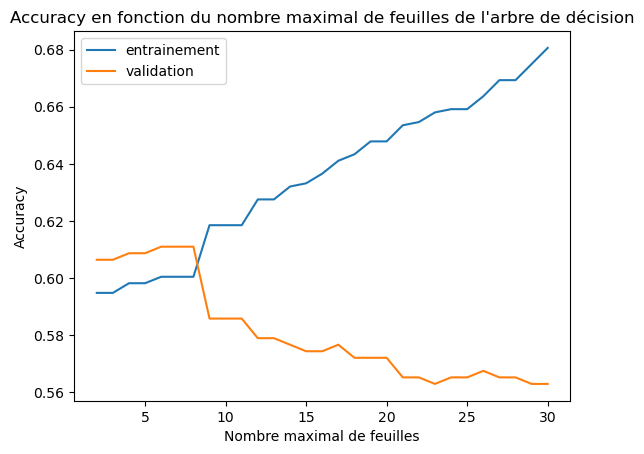

In [76]:
list_accuracy_train = []
list_accuracy_val = []

for i in range(2,31):
    clf =  DecisionTreeClassifier(max_leaf_nodes=i)
    clf.fit(x_train,y_train)
    
    y_pred_train = clf.predict(x_train)
    accuracy_train = accuracy_score(y_pred_train,y_train)
    list_accuracy_train.append(accuracy_train)
    
    y_pred_val = clf.predict(x_val)
    accuracy_val = accuracy_score(y_pred_val,y_val)
    list_accuracy_val.append(accuracy_val)

plt.plot(range(2,31), list_accuracy_train, label = 'entrainement')
plt.plot(range(2,31),list_accuracy_val, label = 'validation')

plt.xlabel("Nombre maximal de feuilles")
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du nombre maximal de feuilles de l'arbre de décision")
plt.legend()

plt.show()

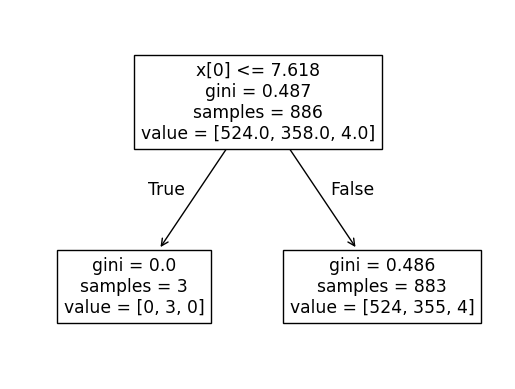

Accuracy de l'ensemble de test :  0.5202702702702703
Précision :  1.0
Recall :  0.5202702702702703
F1-score :  0.6844444444444444
Matrice de confusion :
 [[0.52027027 0.47972973]
 [0.         0.        ]]


/home/digit/miniconda3/envs/humour/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [86]:
clf = DecisionTreeClassifier(max_leaf_nodes=2)
clf.fit(x_train, y_train)
plot_tree(clf)
plt.show()

y_pred_test = clf.predict(x_test)
accuracy_test = accuracy_score(y_pred_test, y_test)
print("Accuracy de l'ensemble de test : ", accuracy_test)
precision = precision_score(y_pred_test, y_test, average='weighted')
print("Précision : ", precision)
recall = recall_score(y_pred_test, y_test, average='weighted')
print("Recall : ", recall)
f1 = f1_score(y_pred_test, y_test, average='weighted')
print("F1-score : ", f1)
conf_mat = confusion_matrix(y_pred_test, y_test, normalize='all')
print("Matrice de confusion :\n", conf_mat)